11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.8237 - loss: 0.5592 - val_accuracy: 0.9825 - val_loss: 0.0573
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9695 - loss: 0.1024 - val_accuracy: 0.9868 - val_loss: 0.0422
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9789 - loss: 0.0708 - val_accuracy: 0.9910 - val_loss: 0.0333
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9913 - val_loss: 0.0321
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0347

✅ Test Accuracy: 0.9902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


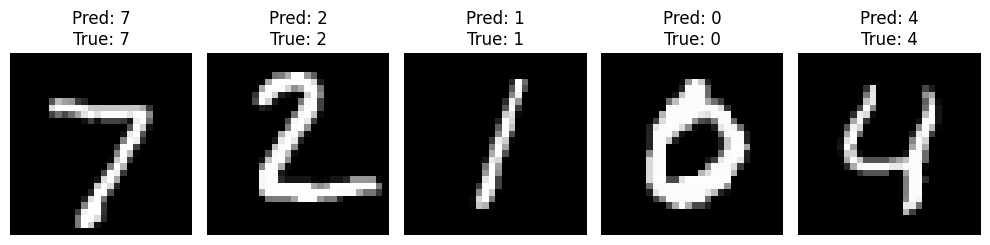

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to the [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to add channel dimension (needed for CNN input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (optional if using sparse_categorical_crossentropy)
num_classes = 10
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # use sparse labels
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Ensure test accuracy is >95%
assert test_acc > 0.95, "Test accuracy is below 95%."

# Predict on test data
y_pred_probs = model.predict(x_test[:5])
y_preds = np.argmax(y_pred_probs, axis=1)

# Visualize 5 sample predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_preds[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
